In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
pip install -q -U keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [49]:
df=pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv")

In [50]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
df.corr()["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [52]:
x=df.iloc[:,:-1]

In [53]:
x.shape

(768, 8)

In [54]:
y=df.iloc[:,-1]

In [55]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [57]:
tnf1=ColumnTransformer(transformers=[
    ("tnsf",StandardScaler(),slice(0,9))
]


)

In [58]:
x=tnf1.fit_transform(x)

In [59]:
x.shape

(768, 8)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=1)

In [62]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential

In [63]:
model=Sequential()
model.add(Dense(32,activation="relu",input_dim=8))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [64]:
history=model.fit(x_train,y_train,batch_size=32,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
20/20 [==============================] - 1s 11ms/step - loss: 0.6828 - accuracy: 0.5879 - val_loss: 0.6419 - val_accuracy: 0.6883
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6330 - accuracy: 0.6710 - val_loss: 0.5933 - val_accuracy: 0.7532
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5953 - accuracy: 0.7329 - val_loss: 0.5589 - val_accuracy: 0.7597
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5684 - accuracy: 0.7590 - val_loss: 0.5341 - val_accuracy: 0.7792
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5474 - accuracy: 0.7720 - val_loss: 0.5181 - val_accuracy: 0.7922
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5299 - accuracy: 0.7606 - val_loss: 0.5022 - val_accuracy: 0.7987
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5148 - accuracy: 0.7687 - val_loss: 0.4907 - val_accuracy: 0.8052
Epoch 8/100


Epoch 59/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4309 - accuracy: 0.7883 - val_loss: 0.4612 - val_accuracy: 0.8247
Epoch 60/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4307 - accuracy: 0.7899 - val_loss: 0.4611 - val_accuracy: 0.8182
Epoch 61/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4304 - accuracy: 0.7850 - val_loss: 0.4610 - val_accuracy: 0.8247
Epoch 62/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4296 - accuracy: 0.7915 - val_loss: 0.4612 - val_accuracy: 0.8247
Epoch 63/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4297 - accuracy: 0.7866 - val_loss: 0.4609 - val_accuracy: 0.8247
Epoch 64/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4293 - accuracy: 0.7866 - val_loss: 0.4612 - val_accuracy: 0.8247
Epoch 65/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4283 - accuracy: 0.7899 - val_loss: 0.4603 - val_accuracy: 0.8247
Epoch 

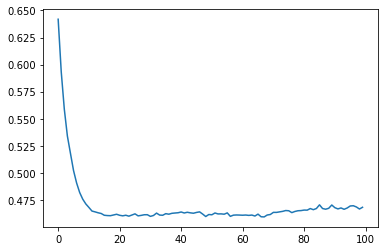

In [65]:
plt.plot(history.history["val_loss"])

In [66]:
#1. how to select appropriate optimizer
#2. No,of nodes in a layers
#3. How to sleect no.of layer
#4. all in all one model

In [67]:
import kerastuner as kt

# how to select appropriate optimizer

In [68]:
def build_model(hp):
    model=Sequential()
    model.add(Dense(32,activation="relu",input_dim=8))
    model.add(Dense(1,activation="sigmoid"))
    optimizer=hp.Choice("optimizer",["adam","sgd","rmsprop","adadelta"])
    model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])
    return model

In [69]:
tuner=kt.RandomSearch(build_model,objective="val_accuracy",max_trials=5)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [70]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

INFO:tensorflow:Oracle triggered exit


In [71]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [26]:
model=tuner.get_best_models(num_models=1)[0]

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(x_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(x_test,y_test))

Epoch 7/100
20/20 [==============================] - 1s 18ms/step - loss: 0.5337 - accuracy: 0.7215 - val_loss: 0.5084 - val_accuracy: 0.7922
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5185 - accuracy: 0.7345 - val_loss: 0.4966 - val_accuracy: 0.7922
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5052 - accuracy: 0.7492 - val_loss: 0.4891 - val_accuracy: 0.7857
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4949 - accuracy: 0.7410 - val_loss: 0.4822 - val_accuracy: 0.7922
Epoch 11/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4867 - accuracy: 0.7492 - val_loss: 0.4788 - val_accuracy: 0.7922
Epoch 12/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4811 - accuracy: 0.7557 - val_loss: 0.4747 - val_accuracy: 0.7922
Epoch 13/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4758 - accuracy: 0.7590 - val_loss: 0.4719 - val_accuracy: 0.7987
Epoch 14

Epoch 65/100
20/20 [==============================] - 0s 10ms/step - loss: 0.4285 - accuracy: 0.7834 - val_loss: 0.4668 - val_accuracy: 0.8247
Epoch 66/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4282 - accuracy: 0.7883 - val_loss: 0.4673 - val_accuracy: 0.8182
Epoch 67/100
20/20 [==============================] - 0s 10ms/step - loss: 0.4280 - accuracy: 0.7948 - val_loss: 0.4669 - val_accuracy: 0.8247
Epoch 68/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4274 - accuracy: 0.7899 - val_loss: 0.4676 - val_accuracy: 0.8247
Epoch 69/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4276 - accuracy: 0.7964 - val_loss: 0.4674 - val_accuracy: 0.8247
Epoch 70/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4273 - accuracy: 0.7932 - val_loss: 0.4670 - val_accuracy: 0.8247
Epoch 71/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4266 - accuracy: 0.7866 - val_loss: 0.4668 - val_accuracy: 0.8247
Epoc

# No. of nodes in a layers

In [29]:
def build_model(hp):
    model=Sequential()
    # units=hp.Int("units",min_value=8,max_value=128,step=8)
    units=hp.Choice("units",[8,128,8])
    model.add(Dense(units=units,activation="relu",input_dim=8))
    model.add(Dense(1,activation="sigmoid"))
    # model.compile(optimizer="rmsprop",loss="binary_crossentropy",metricss=["accuracy"])
    model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])
    return model

In [30]:
tuner=kt.RandomSearch(build_model,objective="val_accuracy",max_trials=5,directory="mydirectoy",project_name="riad")

INFO:tensorflow:Reloading Oracle from existing project mydirectoy\riad\oracle.json
INFO:tensorflow:Reloading Tuner from mydirectoy\riad\tuner0.json


In [31]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

INFO:tensorflow:Oracle triggered exit


In [32]:
tuner.get_best_hyperparameters()[0].values

{'units': 128}

In [33]:
model=tuner.get_best_models(num_models=1)[0]

In [34]:
from keras.engine.training import optimizers
model.fit(x_train,y_train,epochs=100,batch_size=32,initial_epoch=6,validation_data=(x_test,y_test))

Epoch 7/100
20/20 [==============================] - 1s 13ms/step - loss: 0.4777 - accuracy: 0.7687 - val_loss: 0.4831 - val_accuracy: 0.7857
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4685 - accuracy: 0.7801 - val_loss: 0.4781 - val_accuracy: 0.7792
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4633 - accuracy: 0.7752 - val_loss: 0.4784 - val_accuracy: 0.7727
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4599 - accuracy: 0.7818 - val_loss: 0.4762 - val_accuracy: 0.7662
Epoch 11/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4564 - accuracy: 0.7818 - val_loss: 0.4765 - val_accuracy: 0.7597
Epoch 12/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4539 - accuracy: 0.7801 - val_loss: 0.4751 - val_accuracy: 0.7662
Epoch 13/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4529 - accuracy: 0.7752 - val_loss: 0.4760 - val_accuracy: 0.7597
Epoch 14

Epoch 65/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4096 - accuracy: 0.8062 - val_loss: 0.4632 - val_accuracy: 0.7987
Epoch 66/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4087 - accuracy: 0.8094 - val_loss: 0.4655 - val_accuracy: 0.7987
Epoch 67/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4082 - accuracy: 0.8078 - val_loss: 0.4645 - val_accuracy: 0.7922
Epoch 68/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4074 - accuracy: 0.8062 - val_loss: 0.4615 - val_accuracy: 0.7922
Epoch 69/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8111 - val_loss: 0.4646 - val_accuracy: 0.7922
Epoch 70/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8094 - val_loss: 0.4648 - val_accuracy: 0.7987
Epoch 71/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4058 - accuracy: 0.8127 - val_loss: 0.4632 - val_accuracy: 0.7922
Epoch 

# How to sleect no.of layer

In [35]:
def build_model(hp):
    model=Sequential()
    model.add(Dense(72,activation="relu",input_dim=8))
    for i in range(hp.Int("num_layers",min_value=1,max_value=10)):
        model.add(Dense(72,activation="relu"))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])
    return model


In [36]:
tuner=kt.RandomSearch(build_model,objective="val_accuracy",max_trials=5,directory="mydir",project_name="layer")

INFO:tensorflow:Reloading Oracle from existing project mydir\layer\oracle.json
INFO:tensorflow:Reloading Tuner from mydir\layer\tuner0.json


In [37]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

INFO:tensorflow:Oracle triggered exit


In [38]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 6}

In [39]:
model=tuner.get_best_models(num_models=1)[0]

In [40]:
model.fit(x_train,y_train,epochs=100,initial_epoch=6,validation_data=(x_test,y_test))

Epoch 7/100
20/20 [==============================] - 2s 16ms/step - loss: 0.4253 - accuracy: 0.7964 - val_loss: 0.4566 - val_accuracy: 0.7987
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4162 - accuracy: 0.8078 - val_loss: 0.4747 - val_accuracy: 0.7922
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4024 - accuracy: 0.8029 - val_loss: 0.5103 - val_accuracy: 0.7792
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3916 - accuracy: 0.8208 - val_loss: 0.4480 - val_accuracy: 0.8052
Epoch 11/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3767 - accuracy: 0.8290 - val_loss: 0.4984 - val_accuracy: 0.7403
Epoch 12/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3731 - accuracy: 0.8322 - val_loss: 0.5067 - val_accuracy: 0.7727
Epoch 13/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3570 - accuracy: 0.8502 - val_loss: 0.4994 - val_accuracy: 0.7922
Epoch 14

Epoch 65/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0771 - accuracy: 0.9739 - val_loss: 1.8138 - val_accuracy: 0.7338
Epoch 66/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0326 - accuracy: 0.9902 - val_loss: 2.4959 - val_accuracy: 0.6883
Epoch 67/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0572 - accuracy: 0.9805 - val_loss: 1.9139 - val_accuracy: 0.7468
Epoch 68/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0130 - accuracy: 0.9967 - val_loss: 2.1869 - val_accuracy: 0.7338
Epoch 69/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.9870 - val_loss: 2.3649 - val_accuracy: 0.6494
Epoch 70/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0319 - accuracy: 0.9886 - val_loss: 2.3935 - val_accuracy: 0.7078
Epoch 71/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0926 - accuracy: 0.9805 - val_loss: 2.0810 - val_accuracy: 0.7143
Epoch 

# All in all one model

In [41]:
def build_model(hp):
    model=Sequential()
    
    units=hp.Int("units",min_value=8,max_value=128,step=8)
    model.add(Dense(units=units,
                    activation=hp.Choice("activation",["gelu","elu","relu","leaky_relu"]),input_dim=8))
    model.add(Dropout(hp.Choice("dropout",values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    for i in range(hp.Int("layers",min_value=1,max_value=10)):
        model.add(Dense(units=units,
                    activation=hp.Choice("activation",["gelu","elu","relu","leaky_relu"])))
        model.add(Dropout(hp.Choice("dropout",values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    model.add(Dense(1,activation="sigmoid"))
    optimizers=hp.Choice("optimizer",["rmsprop","adam","sgd","adadelta"])

    model.compile(optimizer=optimizers,loss="binary_crossentropy",metrics=["accuracy"])
    return model

    

In [42]:
tuner=kt.RandomSearch(build_model,objective="val_accuracy",max_trials=5,directory="myd",project_name="all")

INFO:tensorflow:Reloading Oracle from existing project myd\all\oracle.json
INFO:tensorflow:Reloading Tuner from myd\all\tuner0.json


In [43]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

INFO:tensorflow:Oracle triggered exit


In [44]:
tuner.get_best_hyperparameters()[0].values

{'units': 128,
 'activation': 'elu',
 'dropout': 0.1,
 'layers': 5,
 'optimizer': 'rmsprop'}

In [45]:
model=tuner.get_best_models(num_models=1)[0]

In [46]:
model.fit(x_train,y_train,epochs=100,initial_epoch=5,validation_data=(x_test,y_test),batch_size=32)

Epoch 6/100
20/20 [==============================] - 2s 18ms/step - loss: 0.4853 - accuracy: 0.7671 - val_loss: 0.4901 - val_accuracy: 0.7857
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4799 - accuracy: 0.7655 - val_loss: 0.4675 - val_accuracy: 0.8182
Epoch 8/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4785 - accuracy: 0.7590 - val_loss: 0.4856 - val_accuracy: 0.7922
Epoch 9/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4875 - accuracy: 0.7622 - val_loss: 0.5093 - val_accuracy: 0.7727
Epoch 10/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4811 - accuracy: 0.7622 - val_loss: 0.4957 - val_accuracy: 0.7662
Epoch 11/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4753 - accuracy: 0.7671 - val_loss: 0.4953 - val_accuracy: 0.7727
Epoch 12/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4747 - accuracy: 0.7622 - val_loss: 0.5233 - val_accuracy: 0.7662
Epoch 13/

Epoch 64/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4002 - accuracy: 0.8257 - val_loss: 0.4767 - val_accuracy: 0.8052
Epoch 65/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4153 - accuracy: 0.8192 - val_loss: 0.5575 - val_accuracy: 0.7662
Epoch 66/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4122 - accuracy: 0.8062 - val_loss: 0.4781 - val_accuracy: 0.7922
Epoch 67/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3927 - accuracy: 0.8274 - val_loss: 0.4867 - val_accuracy: 0.8052
Epoch 68/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4017 - accuracy: 0.8127 - val_loss: 0.5150 - val_accuracy: 0.8052
Epoch 69/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3816 - accuracy: 0.8257 - val_loss: 0.5172 - val_accuracy: 0.8052
Epoch 70/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3822 - accuracy: 0.8388 - val_loss: 0.4933 - val_accuracy: 0.7792
Epoch 